<a href="https://colab.research.google.com/github/Nazmul92/CMPT828-project/blob/main/CMPT828_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn import manifold
import imageio
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Import dataset

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/HAM_data/HAM10000_metadata.csv')

In [ ]:
target = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# HAM full dataset

In [ ]:
class_count = df['dx'].value_counts()

In [ ]:
class_count.values

array([6705, 1113, 1099,  514,  327,  142,  115])

In [ ]:
dx_to_int = {dx: i for i, dx in enumerate(df['dx'].unique())}

In [ ]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
df_labels = df['dx'].map(dx_to_int)

In [ ]:
size = (64, 64)
df_images = []
for i, row in df.iterrows():
    img = imageio.imread('/content/drive/MyDrive/HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img).resize(size))
    df_images.append(resized_img)

In [ ]:
np.array(df_images).shape

(10015, 64, 64, 3)

In [ ]:
df_images = np.array(df_images)
df_images = df_images.reshape(df_images.shape[0],-1)

In [ ]:
df_images.shape

(10015, 12288)

In [ ]:
tsne = manifold.TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_images)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
df_tsne.shape

(10015, 3)

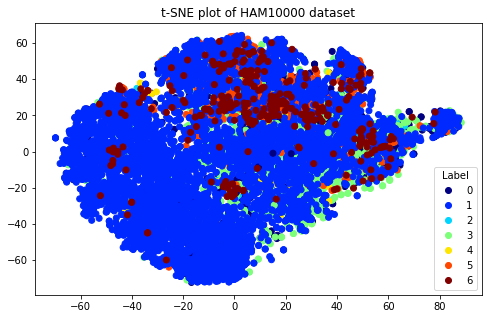

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(df_tsne[:,0], df_tsne[:,1], c=df_labels, cmap='jet')
plt.title('t-SNE plot of HAM10000 dataset')

# Loop through each unique label and assign a label to each point
for i, label in enumerate(np.unique(df_labels)):
    plt.scatter([], [], c='gray', alpha=0.5, label=label)
    plt.legend(scatter.legend_elements()[0], np.unique(df_labels), loc='lower right', title='Label')

plt.show()

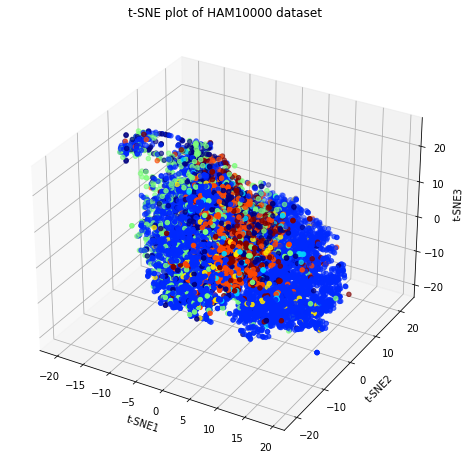

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_tsne[:,0], df_tsne[:,1], df_tsne[:,2], c=df_labels, cmap='jet')
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
ax.set_title('t-SNE plot of HAM10000 dataset')
plt.show()

# Subset of HAM10000 dataset

In [ ]:
subset_metadata = df.sample(frac=0.1, random_state=42)            ## subset(10%) of the dataset

# Balancing the class of the subset

In [ ]:
num_samples_per_label = 300                                                 ## 300 sample for each class
balanced_metadata = pd.DataFrame()
for label in target:
    label_metadata = subset_metadata[subset_metadata['dx'] == label]
    label_samples = label_metadata.sample(n=num_samples_per_label, random_state=42, replace = True)
    balanced_metadata = pd.concat([balanced_metadata, label_samples])

In [ ]:
sub_class_count = balanced_metadata['dx'].value_counts()

In [ ]:
dx_to_int = {dx: i for i, dx in enumerate(balanced_metadata['dx'].unique())}

In [ ]:
dx_to_int

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [ ]:
int_labels = balanced_metadata['dx'].map(dx_to_int)

In [ ]:
int_labels

9874    0
9915    0
9729    0
9690    0
9936    0
       ..
2405    6
2348    6
2405    6
2388    6
2389    6
Name: dx, Length: 2100, dtype: int64

In [ ]:
size = (64, 64)
images = []
for i, row in balanced_metadata.iterrows():
    img = imageio.imread('/content/drive/MyDrive/HAM_data/HAM10000/' + row['image_id'] + '.jpg')
    resized_img = np.array(Image.fromarray(img).resize(size))
    images.append(resized_img)

In [ ]:
images

In [ ]:
images = np.array(images)

In [ ]:
images = images.reshape(images.shape[0], -1)


In [ ]:
images.shape

(2100, 12288)

In [ ]:
tsne = manifold.TSNE(n_components=3, random_state=42)

In [ ]:
model_tsne = tsne.fit_transform(images)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


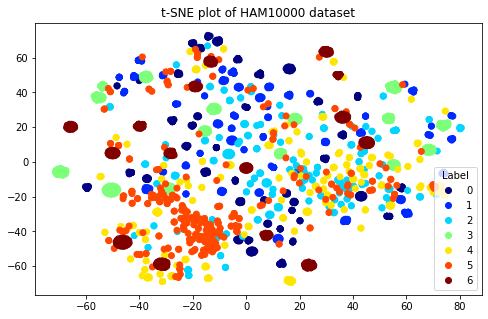

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(model_tsne[:,0], model_tsne[:,1], c=int_labels, cmap='jet')
plt.title('t-SNE plot of HAM10000 dataset')

for i, label in enumerate(np.unique(int_labels)):
    plt.scatter([], [], c='gray', alpha=0.8, label=label)
    plt.legend(scatter.legend_elements()[0], np.unique(int_labels), loc='lower right', title='Label')
plt.show()


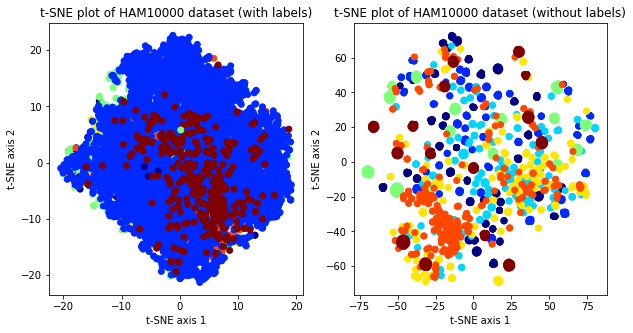

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Left subplot
axs[0].scatter(df_tsne[:,0], df_tsne[:,1], c=df_labels, cmap='jet')
axs[0].set_title('t-SNE plot of HAM10000 dataset (with labels)')
axs[0].set_xlabel('t-SNE axis 1')
axs[0].set_ylabel('t-SNE axis 2')

# Right subplot
axs[1].scatter(model_tsne[:,0], model_tsne[:,1], c=int_labels, cmap='jet')
axs[1].set_title('t-SNE plot of HAM10000 dataset (without labels)')
axs[1].set_xlabel('t-SNE axis 1')
axs[1].set_ylabel('t-SNE axis 2')

plt.show()

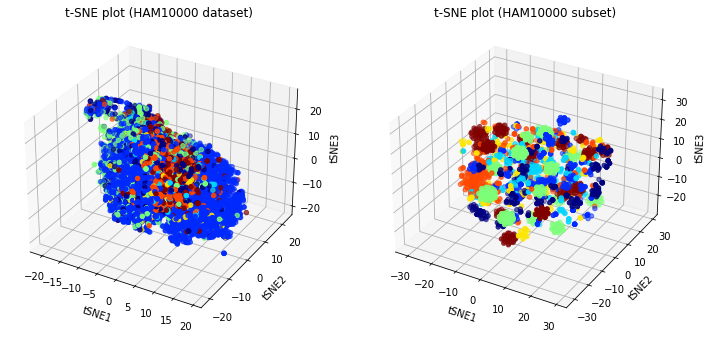

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_tsne[:,0], df_tsne[:,1], df_tsne[:,2], c=df_labels, cmap='jet')
ax1.set_xlabel('tSNE1')
ax1.set_ylabel('tSNE2')
ax1.set_zlabel('tSNE3')
ax1.set_title('t-SNE plot (HAM10000 dataset)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(model_tsne[:,0], model_tsne[:,1], model_tsne[:,2], c=int_labels, cmap='jet')
ax2.set_xlabel('tSNE1')
ax2.set_ylabel('tSNE2')
ax2.set_zlabel('tSNE3')
ax2.set_title('t-SNE plot (HAM10000 subset)')
plt.show()

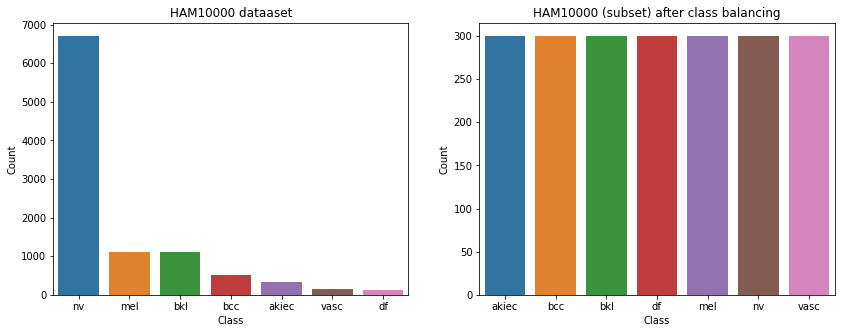

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Create a bar plot for the first subplot
sns.barplot(x=class_count.index, y=class_count.values, ax=axs[0])
axs[0].set_title('HAM10000 dataaset')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# Create a bar plot for the second subplot
sns.barplot(x=sub_class_count.index, y=sub_class_count.values, ax=axs[1])
axs[1].set_title('HAM10000 (subset) after class balancing')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

# Show the plot
plt.show()